pendulum example from wikipedia page of control systems state space representations<br>
https://en.wikipedia.org/wiki/State-space_representation<br>
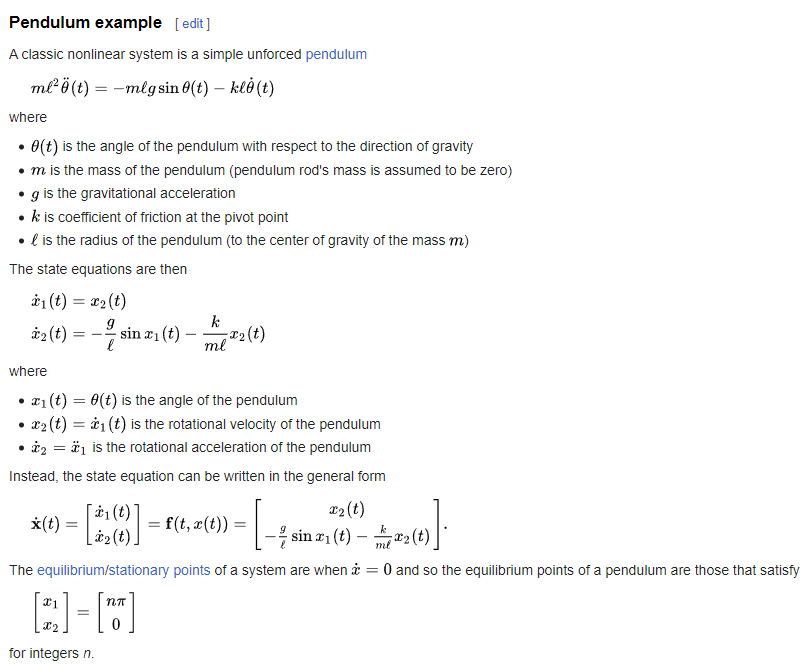

In [1]:
import numpy as np
from scipy.integrate import odeint
import scipy
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from math import pi, sin, cos

In [2]:
def pendulum(x,t):
    '''Returns x_dot for the pendulum system given a state X and time T.

    Args:
        x[0] is angle in radians
        x[1] is rotational velocity in radians/second
        t is time in seconds
    Returns:
        dx = [dx1 dx2]
    
    x0 = theta (pendulum angle)
    x1 = dx0 (rotation velocity of pendulum)
    dx1 = ddx0 (rotational acceleration of pendulum)

    '''
    g = 10  # m/s^2
    l = 1  # m: distance to pendulum mass CoG
    m = 1  # kg: equivalent mass of pendulum at CoG
    k = 0.5  # mu is unitless: friction at pivot

    dx = np.empty(2)
    dx[0] = x[1]
    dx[1] = (-g / l) * sin(x[0]) - (k / (m * l)) * x[1]

    return dx

In [3]:
t = np.arange(0,40,0.1)

x = odeint(pendulum, y0=[pi/2,0], t=t)

dx = np.array([pendulum(x,t) for x,t in zip(x,t)])

print("First five rows of x: [angle, angular velocity]")
print(x[:5,:])
print("First five rows of x: [angular velocity, angular acceleration]")
print(dx[:5,:])

First five rows of x: [angle, angular velocity]
[[ 1.57079633  0.        ]
 [ 1.52162338 -0.97517033]
 [ 1.37754987 -1.89582969]
 [ 1.14522151 -2.73212891]
 [ 0.83623674 -3.41382973]]
First five rows of x: [angular velocity, angular acceleration]
[[  0.         -10.        ]
 [ -0.97517033  -9.50032738]
 [ -1.89582969  -8.86594454]
 [ -2.73212891  -7.74195128]
 [ -3.41382973  -5.71434532]]


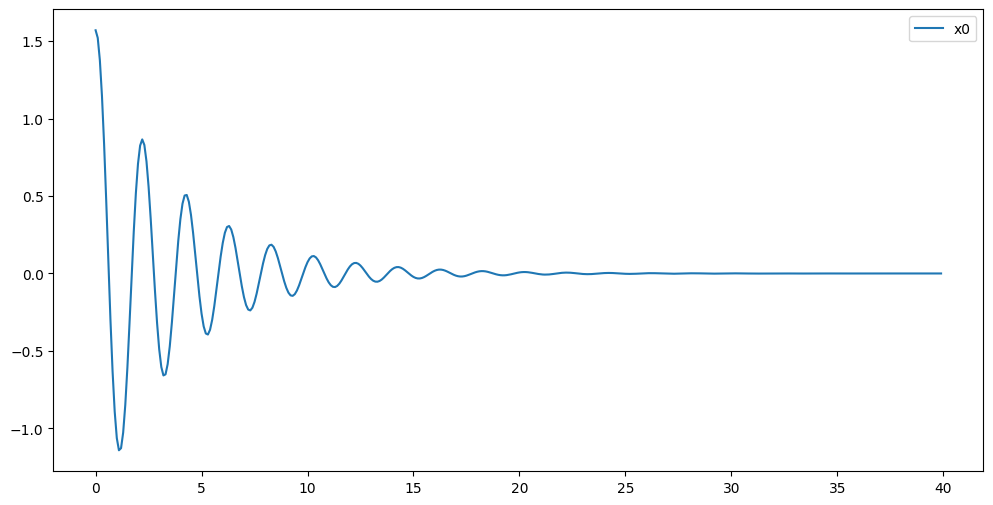

In [4]:
plt.figure(figsize=(12,6))
plt.plot(t,x[:,0])
#plt.plot(t,x[:,1])
#plt.plot(t,dx[:,1])
plt.legend(["x0","x1"])

Now we have "measurements" of X, which is theta and omega, and X_dot, which is omega and alpha.<br>
<br>
time to uncover the system dynamics with sindy!<br>
If we were handed labelled data of an oscillating system, we know that there'd be sines and cosines in there somewhere. So, we'll take the sine and cosine of each of our columns of X.<br>
We can also multiple our columns together.<br>

In [5]:
cos_x0 = np.array([cos(i) for i in x[:,0]]).reshape(-1,1)
cos_x1 = np.array([cos(i) for i in x[:,1]]).reshape(-1,1)

sin_x0 = np.array([sin(i) for i in x[:,0]]).reshape(-1,1)
sin_x1 = np.array([sin(i) for i in x[:,1]]).reshape(-1,1)

x0x1 = np.array([a*b for a,b in zip(x[:,0],x[:,1])]).reshape(-1,1)

In [6]:
augX = np.hstack((x,cos_x0,cos_x1,sin_x0,sin_x1, x0x1))

In [7]:
from sindy import sindy, disp_cf

In [8]:
cf = sindy(augX, dx)

In [9]:
dcf = disp_cf(cf, ["x0", "x1", "cos(x0)", "cos(x1)", "sin(x0)", "sin(x1)", "x0x1"])

     x0      |      x1      |   cos(x0)    |   cos(x1)    |   sin(x0)    |   sin(x1)    |     x0x1     | 
        0.00 |         1.00 |         0.00 |         0.00 |         0.00 |         0.00 |         0.00 | 
        0.00 |        -0.50 |         0.00 |         0.00 |       -10.00 |         0.00 |         0.00 | 
